### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 



### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<ipython-input-1-18970f607bd6>:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data1/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
missing_values = data.isna().sum()
print(missing_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


Looking at rows with, "Car" is has only a very small number of rows with data, so I choose to drop it entirely. 

In [5]:
#drop "car" column
data_drop = data.drop("car", axis = 1)


nan_rows_drop = data_drop[data_drop.isna().any(axis=1)]
print(len(nan_rows_drop), " rows out of ", len(data_drop), " have NaN values after dropping car Column")


605  rows out of  12684  have NaN values after dropping car Column


3. Decide what to do about your missing data -- drop, replace, other...

The rest of the rows with NaN valuies make up less than 5 % of the data, which is an acceptable loss on a data set of this size. I'm choosing to remove the rows with these NaN Value, as there is not a clear way to backfill the data

In [6]:
#drop rows with the other NaN Values
data_final = data_drop.dropna()

4. What proportion of the total observations chose to accept the coupon? 



In [7]:
#percent acceptance
accept_percent = sum(data_final["Y"]==1)/len(data_final)
print("{:.3g}%".format(accept_percent * 100), " of observations accepted the coupon")

56.9%  of observations accepted the coupon


5. Use a bar plot to visualize the `coupon` column.

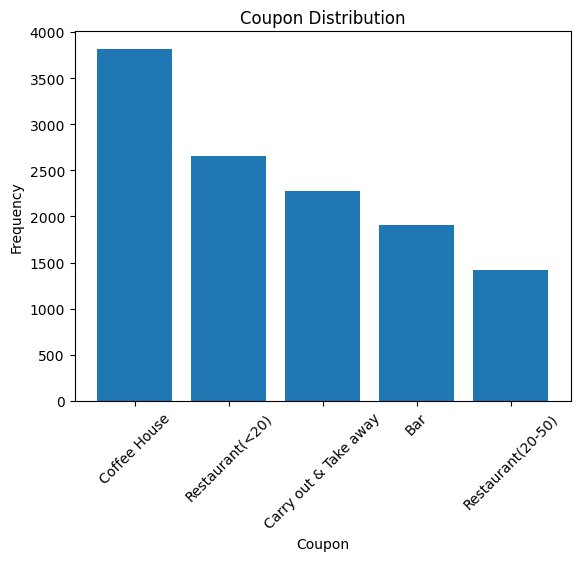

In [8]:
coupon_counts = data_final['coupon'].value_counts()

# Create the bar plot using Matplotlib
plt.bar(coupon_counts.index, coupon_counts.values)

# Add labels and title
plt.xlabel('Coupon')
plt.ylabel('Frequency')
plt.title('Coupon Distribution')

# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

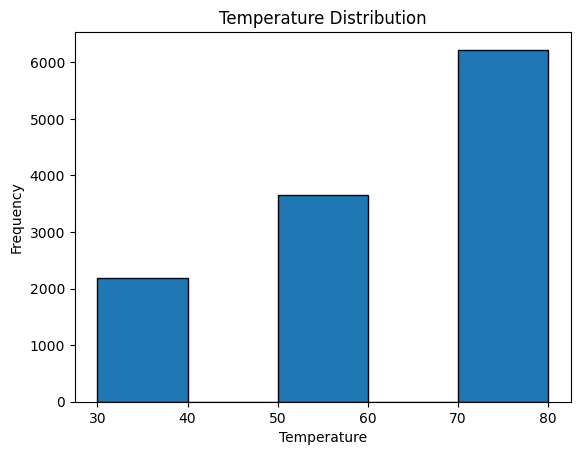

In [9]:
# Create a histogram for the 'temperature' column
plt.hist(data_final['temperature'], bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
bar_only = data_final[data_final["coupon"] == "Bar"]

2. What proportion of bar coupons were accepted?

In [11]:
#Percent Function: since I'm calculating % acceptance frequently, I put it into a function to improve the readability: 
def percent_acceptance(df, column_name='Y', accepted_value=1):
    percent = sum(df[column_name] == accepted_value) / len(df)
    return "{:.4g}%".format(percent * 100)
    

In [12]:
print(percent_acceptance(bar_only), " of the bar coupons were accepted")


41.19%  of the bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [13]:
three_or_less = bar_only[bar_only["Bar"].isin(['never', 'less1', '1~3'])]
print(percent_acceptance(three_or_less), " was the acceptance rate of those who went to the bar 3 or fewer times")

three_or_more = bar_only[bar_only["Bar"].isin(['gt8', '4~8'])]
print(percent_acceptance(three_or_more), " was the acceptance rate of those who went to the bar more than 3 times")

37.27%  was the acceptance rate of those who went to the bar 3 or fewer times
76.17%  was the acceptance rate of those who went to the bar more than 3 times


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [14]:
# Replace '50plus' with 51 and 'below21' with 20
bar_only.loc[bar_only['age'] == '50plus', 'age'] = 51
bar_only.loc[bar_only['age'] == 'below21', 'age'] = 20

# Convert 'age' to numeric
bar_only['age'] = pd.to_numeric(bar_only['age'])

#create a df for those who go to the bar more than once a month and are over the age of 25
more_than_once_and_25 = bar_only[(bar_only['Bar'].isin(['1~3', 'gt8', '4~8'])) & (bar_only['age'] > 25)]
print(percent_acceptance(more_than_once_and_25), " was the acceptance rate of those who went to the bar more than once a month and are over the age of 25 ")

#create a df for all others
all_others = bar_only[(bar_only['age'] < 25) | (bar_only['Bar'].isin(['never', 'less1']))]
print(percent_acceptance(all_others), "was the acceptance rate of all others")

<ipython-input-14-3a65e399279f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_only['age'] = pd.to_numeric(bar_only['age'])


68.98%  was the acceptance rate of those who went to the bar more than once a month and are over the age of 25 
33.77% was the acceptance rate of all others


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [15]:
more_than_once_not_kid_occ = bar_only[bar_only["Bar"].isin(['1~3','gt8', '4~8']) & ~bar_only['passanger'].isin(['Kid(s)'])& ~bar_only['occupation'].isin(['farming','fishing','forestry'])]
print(percent_acceptance(more_than_once_not_kid_occ), "was the acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry")


70.94% was the acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [21]:
more_than_once_not_kid_not_widowed = bar_only[bar_only["Bar"].isin(['1~3','gt8', '4~8']) & ~bar_only['passanger'].isin(['Kid(s)'])& ~bar_only['maritalStatus'].isin(['Widowed'])]
print(percent_acceptance(more_than_once_not_kid_not_widowed), "was the acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed")

more_than_once_under_30 = bar_only[bar_only["Bar"].isin(['1~3','gt8', '4~8']) & (bar_only['age'] > 30)]
print(percent_acceptance(more_than_once_under_30), "was the acceptance rate of drivers who go to bars more than once a month and are under the age of 30")

cheap_restuant_and_low_income = bar_only[bar_only["income"].isin(['Less than $12500','$12500 - $24999', '$25000 - $37499','$37500 - $49999']) & (bar_only['RestaurantLessThan20'].isin(['4~8','gt8']))]
print(percent_acceptance(cheap_restuant_and_low_income), "was the acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K")



70.94% was the acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
63.93% was the acceptance rate of drivers who go to bars more than once a month and are under the age of 30
45.65% was the acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

These observations show a few things abour the people who accept bar coupons: 
1) There was very low acceptance among paticipants who do not go to bars
2) Low income and frequenting cheap restuarants was a predictor of not accepting the coupon
3) Of drivers who go to the bars more than once a month, the lowest category of acceptance was drivers under the age of 30. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

As a coffee shop fanatic, I am going to focus on the coffee shop coupon group

In [23]:
coffee_only = data_final[data_final["coupon"] == "Coffee House"]


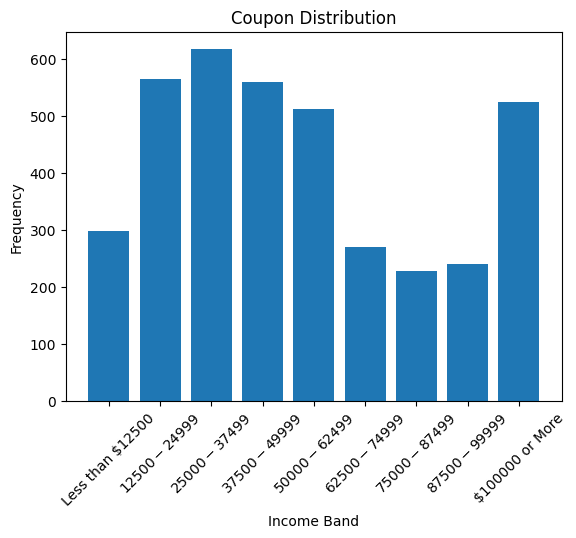

In [40]:
# Define the desired order for income categories
desired_order = [
    'Less than $12500',
    '$12500 - $24999',
    '$25000 - $37499',
    '$37500 - $49999',
    '$50000 - $62499',
    '$62500 - $74999',
    '$75000 - $87499',
    '$87500 - $99999',
    '$100000 or More'
    
]

# Calculate value counts for the 'income' column
income_counts = coffee_only['income'].value_counts()

# Reindex based on the desired order
income_counts = income_counts.reindex(desired_order, fill_value=0)

# Create the bar plot using Matplotlib
plt.bar(income_counts.index, income_counts.values)

# Add labels and title
plt.xlabel('Income Band')
plt.ylabel('Frequency')
plt.title('Coupon Distribution')


# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

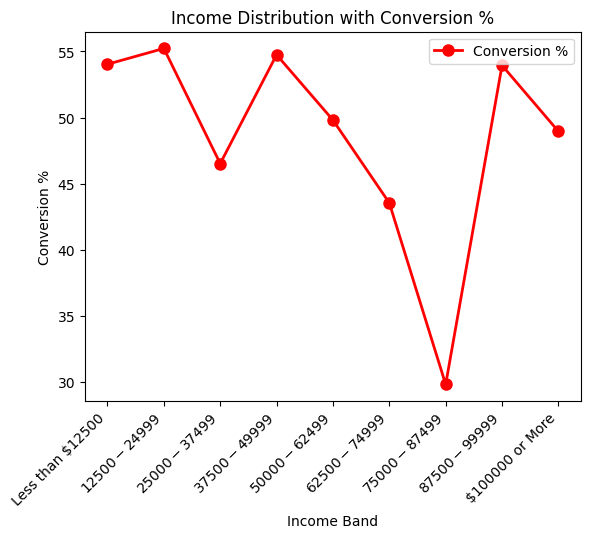

In [42]:
# Calculate conversion sums (where Y = 1) and conversion percentages
conversion_sums = coffee_only.groupby('income')['Y'].sum()
conversion_counts = coffee_only.groupby('income')['Y'].count()
conversion_percentages = (conversion_sums / conversion_counts) * 100
conversion_percentages = conversion_percentages.reindex(desired_order, fill_value=0)

plt.plot(conversion_percentages.index, conversion_percentages.values, color='red', marker='o', linestyle='-', linewidth=2, markersize=8, label='Conversion %')


# Add labels and title
plt.xlabel('Income Band')
plt.ylabel('Conversion %')
plt.title('Income Distribution with Conversion %')

# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right') 

# Add a legend
plt.legend()

plt.show()



In [43]:
print(coffee_only['age'].unique())

['21' '46' '26' '31' '41' '50plus' '36' 'below21']


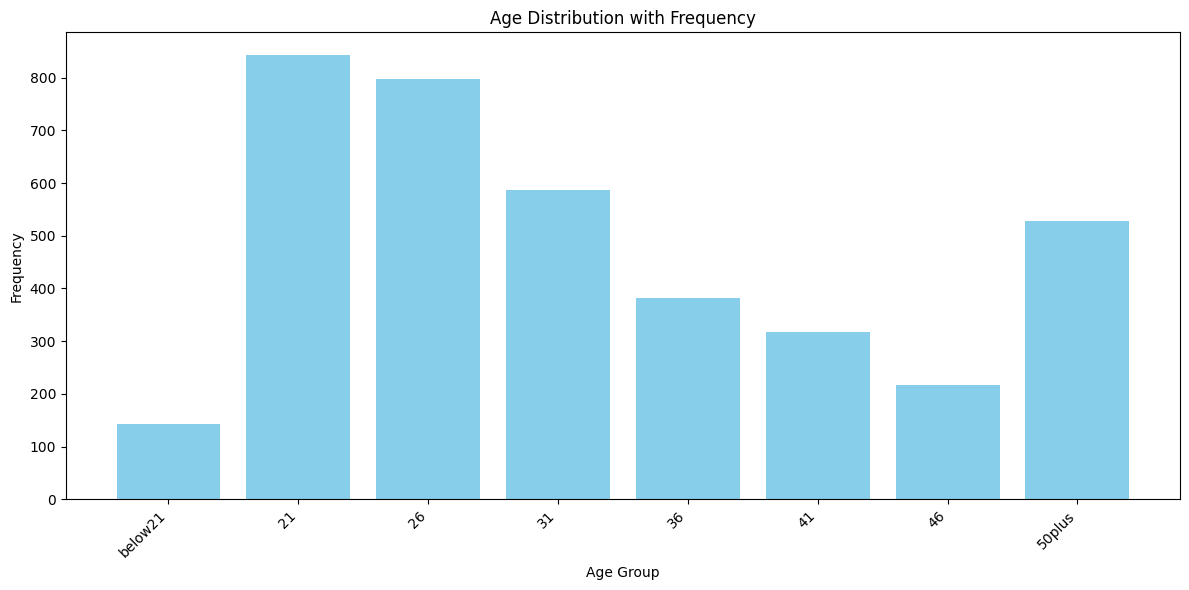

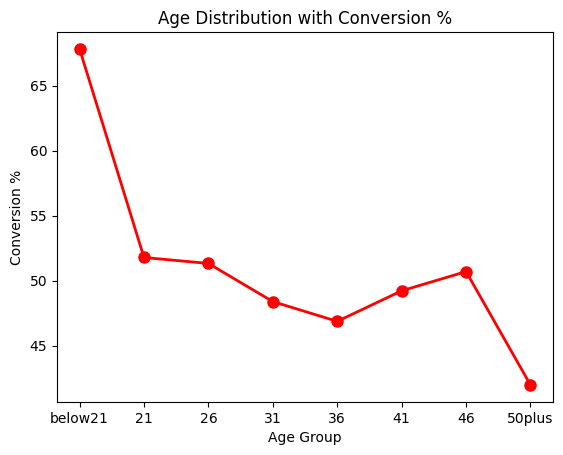

In [49]:
desired_order_age = ['below21', '21', '26', '31', '36', '41', '46', '50plus']

# Calculate value counts for the 'age' column
age_counts = coffee_only['age'].value_counts()

# Reindex based on the desired order
age_counts = age_counts.reindex(desired_order_age, fill_value=0)

# Calculate conversion sums (where Y = 1) and conversion percentages
conversion_sums_age = coffee_only.groupby('age')['Y'].sum()
conversion_counts_age = coffee_only.groupby('age')['Y'].count()
conversion_percentages_age = (conversion_sums_age / conversion_counts_age) * 100
conversion_percentages_age = conversion_percentages_age.reindex(desired_order_age, fill_value=0)

# Create the bar plot using Matplotlib
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

# Plot bar chart
plt.bar(age_counts.index, age_counts.values, color='skyblue', label='Frequency')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Age Distribution with Frequency')

# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right') 


# Show the plot
plt.tight_layout() 
plt.show()

plt.plot(conversion_percentages_age.index, conversion_percentages_age.values, color='red', marker='o', linestyle='-', linewidth=2, markersize=8, label='Conversion %')
plt.xlabel('Age Group')
plt.ylabel('Conversion %')
plt.title('Age Distribution with Conversion %')

plt.show()
